# - Exercici 1
### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import numpy as np
from numpy import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Publicacions Facebook Thailandia.csv")

In [4]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


### 1.1. Neteja base de dades

In [5]:
df.duplicated().sum() #Compta els duplicats

51

In [6]:
df[df.duplicated(keep=False)].sort_values(by='status_published').head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6220,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,NaN,NaN,NaN,NaN
6271,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0,NaN,NaN,NaN,NaN
6270,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,NaN,NaN,NaN,NaN
6219,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0,NaN,NaN,NaN,NaN
6269,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0,NaN,NaN,NaN,NaN
6218,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0,NaN,NaN,NaN,NaN
6217,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,NaN,NaN,NaN,NaN
6268,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0,NaN,NaN,NaN,NaN
6267,819700534875473_955743124604546,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0,NaN,NaN,NaN,NaN
6216,819700534875473_955743124604546,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0,NaN,NaN,NaN,NaN


Hi han registres identics, el que significa que s'han duplicat. És molt important elimina-los ja que restan integritat del model.

In [7]:
df = df.drop_duplicates(keep='first') #Elimina duplicats

In [8]:
df.reset_index(drop=True, inplace=True) #Serveix per restablir el número de l'index de cada registre.
# Ho faig per no tenir cap problema a l'hora de concatena les dummies al pca

In [9]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [10]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

La variable status_type és categórica, classifica les pusblicacions segons si són fotos, videos, enllaços o estatus. Per poder fer que el model funcioni he de convertir la variable en dummies, però ho faré més tard.

In [11]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
6995,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
6996,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
6997,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64

La data de publicació no em serveix per fer el model, la elimino. Les últimes quatre columnes tampoc em serveixen ja que tot són valors NaN, les elimino.

In [13]:
df = df.drop(["status_id", "status_published", "Column1", "Column2", "Column3", "Column4"], axis=1)

In [14]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0
6995,photo,16,0,0,14,1,0,1,0,0
6996,photo,2,0,0,1,1,0,0,0,0
6997,photo,351,12,22,349,2,0,0,0,0


C:\Users\alana.olivieri\AppData\Local\Temp\ipykernel_17928\2954564994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacio = df.corr()


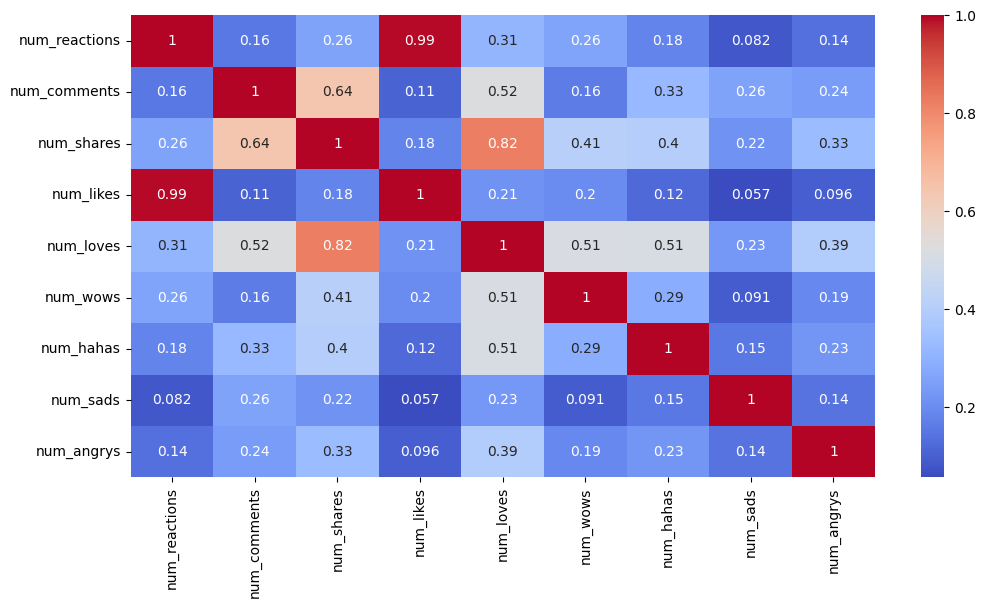

In [15]:
correlacio = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlacio, cmap='coolwarm', annot=True)
plt.show()

El que més crida l'atenció d'aquesta matriu, és la correlació tant elevada que existeix entre el nombre de reaccions i el nombre de likes. Tothom que reacciona a una publicació és en forma de like. També és interesant la correlació entre el nombre de compatits amb el nombre de "loves". Si una publicació agrada casi sempre és més compartida que una que té menys "loves". 

### 1.2. Scaling 

In [16]:
from scipy.stats import shapiro #Llibreria de python importa normaltest per fer l'arlgorisme de Shapiro.
df_s = df.drop(["status_type"], axis=1)
columnes=df_s.columns.tolist() #emmagatzema una llista amb els noms de les columnes del X_train
for i in columnes: #Fa tants tests d'hip com columnes hi hagin.
    stat, p = shapiro(df_s[i]) 
    #L'algorisme shapiro assigna automàticament l'estadistica del test i el p-value.
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05: # L'alpha o nivell de significància és 0,05. Estem al 95% segurs...
     print('La variable', i,' probablement segueix una distribució Normal') 
    #Si el p-value és major que alpha, no rebutjem la hipòtesi nul·la
    else:
     print('La variable ', i, ' probablement NO segueix una distribució Normal') 
    # Si és més petit, rebutjem la hipòtesi nul·la.

stat=0.508, p=0.000
La variable  num_reactions  probablement NO segueix una distribució Normal
stat=0.262, p=0.000
La variable  num_comments  probablement NO segueix una distribució Normal
stat=0.338, p=0.000
La variable  num_shares  probablement NO segueix una distribució Normal
stat=0.487, p=0.000
La variable  num_likes  probablement NO segueix una distribució Normal
stat=0.353, p=0.000
La variable  num_loves  probablement NO segueix una distribució Normal
stat=0.106, p=0.000
La variable  num_wows  probablement NO segueix una distribució Normal
stat=0.148, p=0.000
La variable  num_hahas  probablement NO segueix una distribució Normal
stat=0.136, p=0.000
La variable  num_sads  probablement NO segueix una distribució Normal
stat=0.141, p=0.000
La variable  num_angrys  probablement NO segueix una distribució Normal


c:\Users\alana.olivieri\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


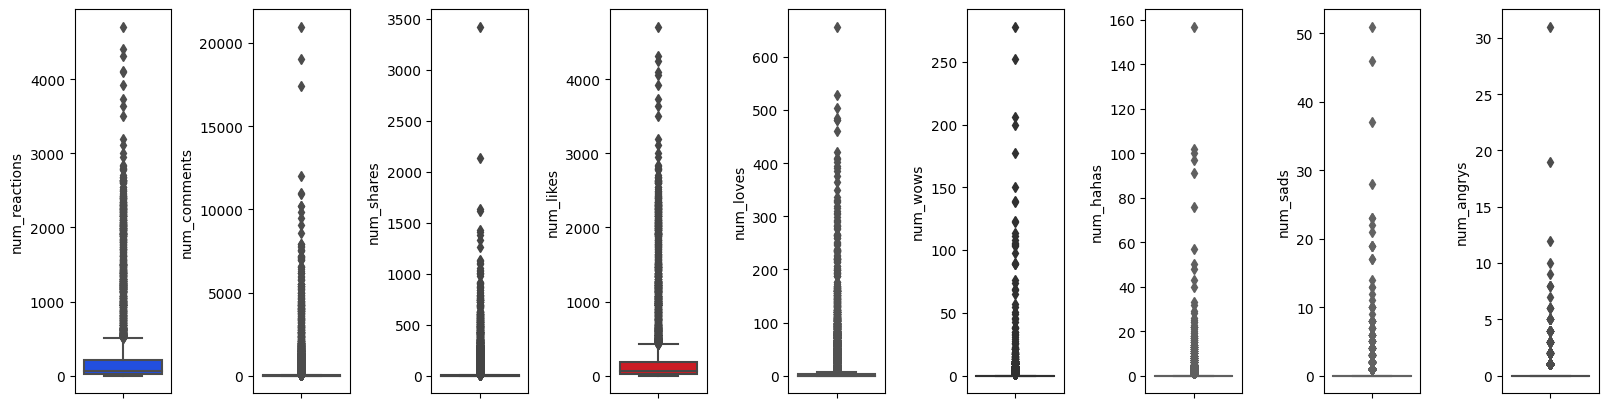

In [17]:
from seaborn.palettes import color_palette
mi_paleta = color_palette("bright", n_colors=len(df_s[columnes].columns))

fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in df_s[columnes].items():
    sns.boxplot(y=titulos, data=df_s[columnes], ax=axs[indice],color=mi_paleta[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

És un gràfic de caixes. Cadascuna de les 9 caixes representa una variable. És molt útil per coneixer els outliers de cada variable. Cada punt negre és un outlier. 

Faré servir el RobustScaler per escalar les dades.

In [18]:
df_scaled = df.copy()

In [19]:
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
df_scaled[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]] = preprocessing.RobustScaler().fit_transform(df_scaled[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]])

In [20]:
df_scaled

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6994,photo,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
6995,photo,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
6996,photo,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
6997,photo,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


In [21]:
df_scaled_s = df_scaled.copy()
df_scaled_s = df_scaled_s.drop(["status_type"], axis=1) #Variable sense la columna categórica.

In [22]:
df_scaled_s

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6994,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
6995,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
6996,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
6997,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


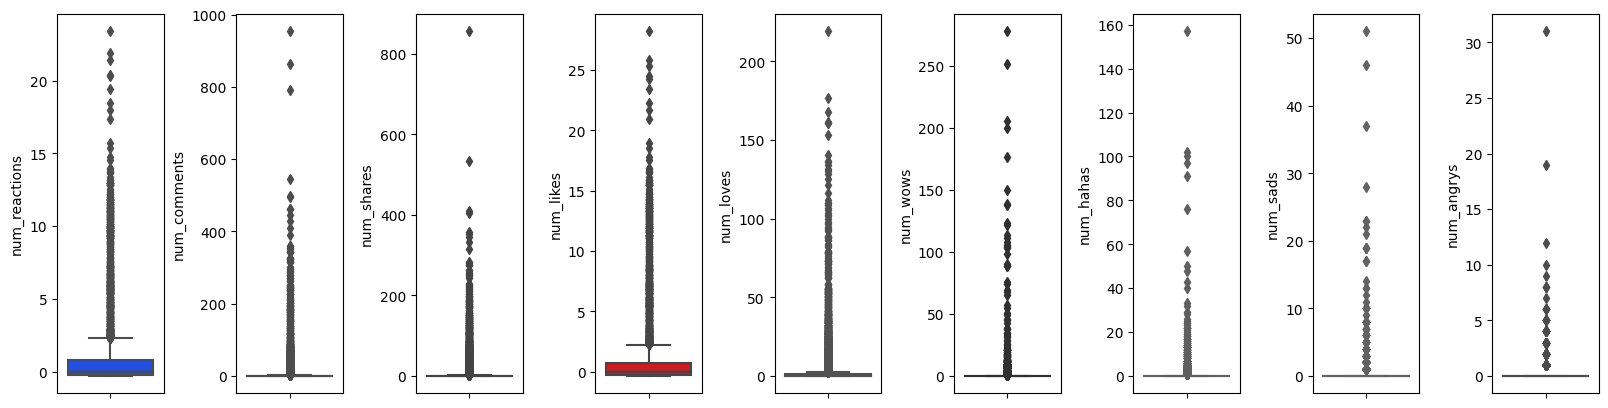

In [23]:
from seaborn.palettes import color_palette
mi_paleta = color_palette("bright", n_colors=len(df_scaled_s[columnes].columns))

fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in df_scaled_s[columnes].items():
    sns.boxplot(y=titulos, data=df_scaled_s[columnes], ax=axs[indice],color=mi_paleta[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

Un cop escalades les dades, es pot veure com l'eix y s'ha reduit. 

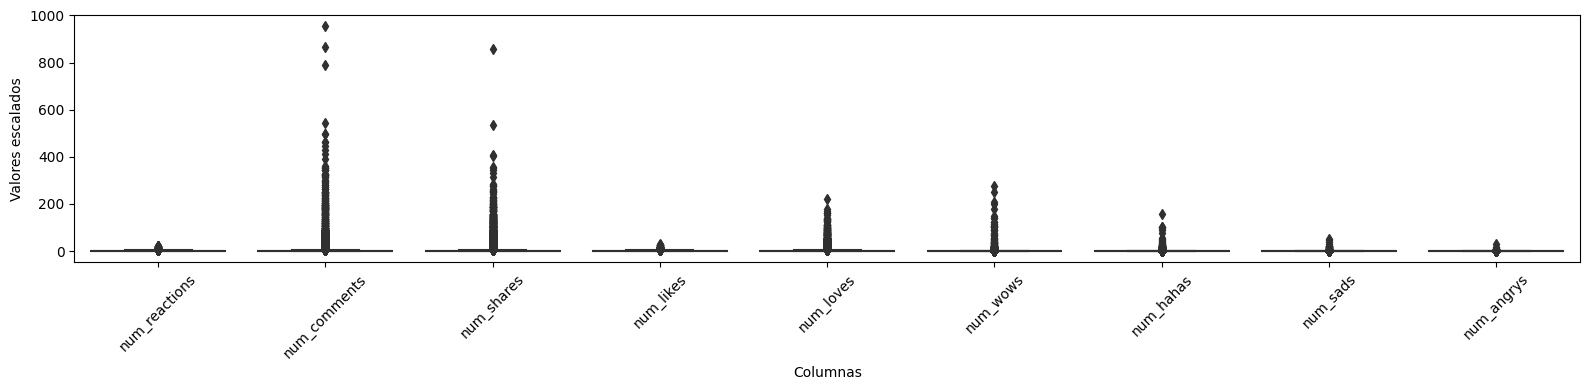

In [24]:
from seaborn.palettes import color_palette
import matplotlib.pyplot as plt

mi_paleta = color_palette("bright", n_colors=len(df_scaled_s[columnes].columns))

# Crear un solo gráfico de cajas
plt.figure(figsize=(16, 4))

# Usar el método boxplot para mostrar todas las cajas en el mismo gráfico
sns.boxplot(data=df_scaled_s[columnes], palette=mi_paleta)

# Añadir títulos a las cajas
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad

# Añadir etiquetas a los ejes
plt.xlabel("Columnas")
plt.ylabel("Valores escalados")

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aquest gràfic serveix per veure la diferència de dimensionalitat entre les variables.

### 1.3. PCA

In [25]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA amb el nombre de components desitjats.
pca_prova = PCA()

# Ajustar el PCA a tus datos escalados
pca_prova.fit(df_scaled_s)

PCA()

Text(0.5, 1.0, 'Variança acumulada')

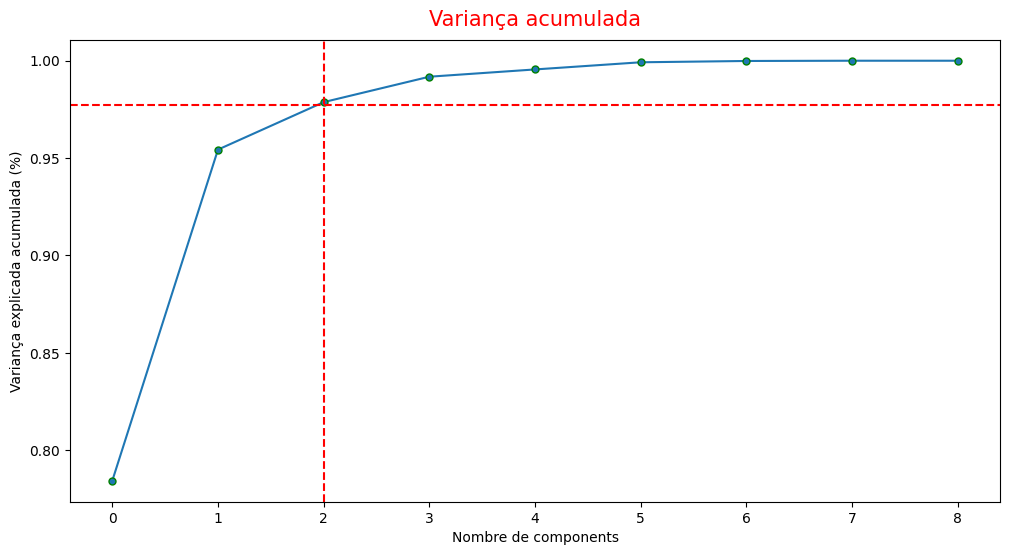

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(pca_prova.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='green')
plt.axhline(0.97743749, color = "red", linestyle = "--")
plt.axvline(2, color = "red", linestyle = "--")
plt.xlabel('Nombre de components')
plt.ylabel('Variança explicada acumulada (%)')
plt.title("Variança acumulada", fontsize=15, pad=10, color='red')


In [27]:
# Es mostra el % de variançaa explicada acumulada.
np.cumsum(pca_prova.explained_variance_ratio_)

array([0.78433741, 0.95436248, 0.97873025, 0.99178905, 0.99552477,
       0.99920008, 0.99986845, 1.        , 1.        ])

La variança acumulada indica el percentatge de la variaça total de les dades que el model pot predir per a cada valor de n_components. Tots els valors que van de 0,95 a 0,99 es podrien agafar. Encara que una variança molt pròxima a 1 pot generar overfitting. Veient el gràfic jo agafaria 2,3 o 4 n_components, preferiblement 2 ja que a l'hora de fer el gràfic és més visual. Per fer desapareixer els dubtes hi ha una funció que retorna el nombre òptim de n_components per a una variança de 0,95. 

In [28]:
pca = PCA(.95)
data_pca = pca.fit(df_scaled_s)
pca.n_components_ #És el nombre óptim de n_components.

2

In [29]:
pca = PCA(n_components = 2)

# Ajustar el PCA a tus datos escalados
pca.fit(df_scaled_s)
pca_df = pd.DataFrame(pca.transform(df_scaled_s), columns=["PCA1", "PCA2"], index=df_scaled_s.index)

In [30]:
print("original shape:   ", df_scaled_s.shape)
print("transformed shape:", pca_df.shape)

original shape:    (6999, 9)
transformed shape: (6999, 2)


Ja tinc el PCA de 2 dimensions fet. Ara concateno la variable dummy que havia eliminat previament.

In [31]:
dummies = pd.get_dummies(df_scaled["status_type"], prefix="status_type")

In [32]:
pca_df = pd.concat([pca_df, dummies], axis=1)
pca_df

,PCA1,PCA2,status_type_link,status_type_photo,status_type_status,status_type_video
0,48.141927,39.279885,0,0,0,1
1,-14.873807,-2.241151,0,1,0,0
2,3.371249,3.438150,0,0,0,1
3,-14.877890,-2.247779,0,1,0,0
4,-14.268106,-1.394616,0,1,0,0
...,...,...,...,...,...,...
6994,-14.880194,-2.251517,0,1,0,0
6995,-14.788323,-2.142925,0,1,0,0
6996,-14.822736,-2.173432,0,1,0,0
6997,-11.064314,1.577548,0,1,0,0


Faig el mateix al df_scaled

In [33]:
df_scaled = pd.concat([df_scaled, dummies], axis=1)
df_scaled

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
6995,photo,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
6996,photo,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
6997,photo,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


### 1.4. Algoritme k-means

Aquest model pertany a la classe d'algoritmes d'aprenentatge no supervisat, ja que no se li dona una variable objectiu, sinó que ell mateix la calcula. El que sí necessita aquest algoritme és saber abans de res el nombre de clusters que ha de generar. Un cop sap quants clusters ha de tenir, assigna dos centroides de manera aleatoria. Cada punt, que és un registre, es assignat a el seu centroide més proper. Seguidament es calcula la mitjana de distància entre el centre i cada punt del cluster i es genera el nou centroide. Es repeteix aquest procés anomenat expectation-maximization, fins que la posició del centroide no canvia.

In [34]:
pca_df.columns = pca_df.columns.astype(str) #Nom de les columnes tipus string

In [35]:
pca_df[pca_df.isna()].sum() #Busca valors NoneType

PCA1                  0.0
PCA2                  0.0
status_type_link      0.0
status_type_photo     0.0
status_type_status    0.0
status_type_video     0.0
dtype: float64

Per determinar el nombre de clusters óptim, vaig a realitzar el "elbow method".

c:\Users\alana.olivieri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alana.olivieri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alana.olivieri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alana.olivieri\AppData\Local\Programs\Python\Pyth

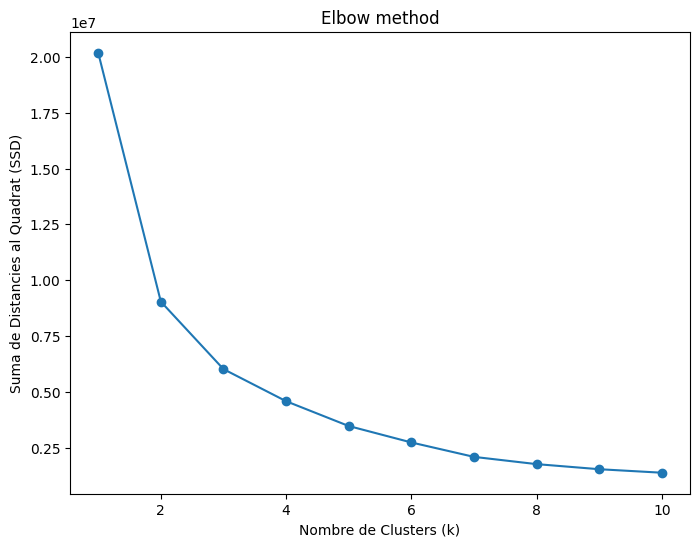

In [36]:
from sklearn.cluster import KMeans

ssd = []

# Prova un rang de valors de k (número de clusters)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    ssd.append(kmeans.inertia_)  # Inertia és la suma de distancies al quadrat

# Dibuixa el gràfic del elbow method
plt.figure(figsize=(8, 6))
plt.plot(K_range, ssd, marker='o')
plt.title('Elbow method')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Suma de Distancies al Quadrat (SSD)')
plt.show()

L'eix de les x representa el nombre de clústers i l'eix de les y representa la suma de distàncies al quadrat. Cada punt de la funció és el resultat de sumar les distàncies al quadrat de cada punt al clúster al qual pertanyen. Quant més petit sigui el SSD millor. Malgrat això, un nombre massa petit de SSD pot portar a overfitting.
S'ha de seleccionar el punt que està al colze. Dit d'una altra manera, el punt a partir del qual la funció comença a descendre de manera lineal. En aquest cas el nombre óptim de clusters és el 3.

In [37]:
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=24)
kmeans.fit(pca_df)

KMeans(n_clusters=3, n_init='auto', random_state=24)

In [38]:
pred_km = kmeans.predict(pca_df)
pred_km #Amb l'aloritme kmeans, es prediu el cluster al que pertany cada registre.

array([2, 1, 1, ..., 1, 1, 1])

In [39]:
pca_df.rename(columns={0: "PCA1"}, inplace=True) #Canvio de nom la primera columna
pca_df.rename(columns={1: "PCA2"}, inplace=True) #Canvio de nom la segona columna

In [40]:
pca_df['cluster_pred_km'] = pred_km #Creo nova columna amb les prediccions de kmeans
pca_df

,PCA1,PCA2,status_type_link,status_type_photo,status_type_status,status_type_video,cluster_pred_km
0,48.141927,39.279885,0,0,0,1,2
1,-14.873807,-2.241151,0,1,0,0,1
2,3.371249,3.438150,0,0,0,1,1
3,-14.877890,-2.247779,0,1,0,0,1
4,-14.268106,-1.394616,0,1,0,0,1
...,...,...,...,...,...,...,...
6994,-14.880194,-2.251517,0,1,0,0,1
6995,-14.788323,-2.142925,0,1,0,0,1
6996,-14.822736,-2.173432,0,1,0,0,1
6997,-11.064314,1.577548,0,1,0,0,1


In [41]:
#df = pd.read_csv("Publicacions Facebook Thailandia.csv") #df original
df['cluster_pred_km'] = pred_km #Creo nova columa al dataset original
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_pred_km
0,video,529,512,262,432,92,3,1,1,0,2
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,1
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0,1
6995,photo,16,0,0,14,1,0,1,0,0,1
6996,photo,2,0,0,1,1,0,0,0,0,1
6997,photo,351,12,22,349,2,0,0,0,0,1


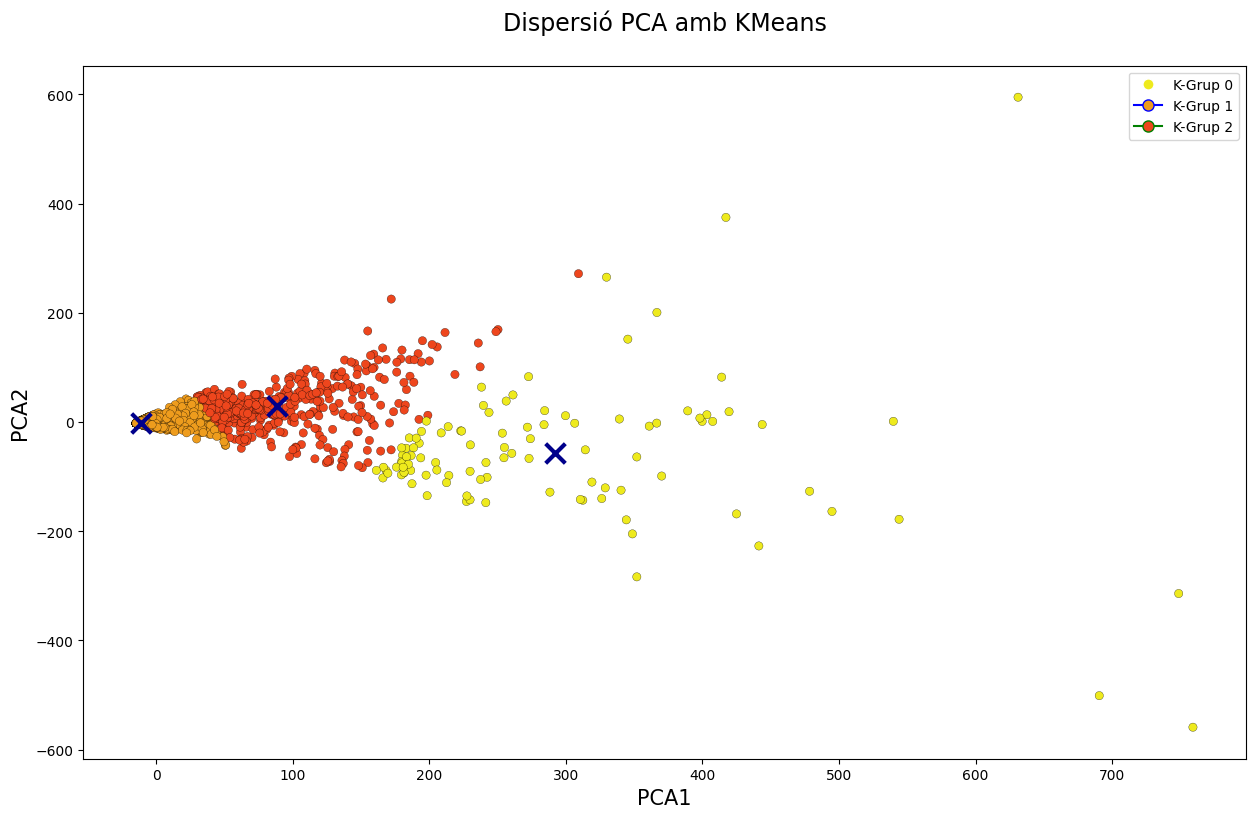

In [42]:
from matplotlib.colors import ListedColormap

centr = kmeans.cluster_centers_ #Calcula els centroides de cada cluster generat per kmeans
colors = ListedColormap(['#EEEA1D', '#EE9C1D', '#EE461D'])
punts_legend = [plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 0', markerfacecolor='#EEEA1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='b', label='K-Grup 1', markerfacecolor='#EE9C1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='g', label='K-Grup 2', markerfacecolor='#EE461D', markersize=8)]


plt.figure(figsize = (15, 9))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pred_km, cmap=colors, edgecolors='black', linewidths=0.2)
plt.scatter(centr[:, 0], centr[:, 1], marker='x', s=200, linewidths=3, color='darkblue')
plt.title('Dispersió PCA amb KMeans\n', fontsize=17)
plt.legend(handles=punts_legend)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)

plt.show()

En aquesta gràfica es poden observar els tres clusters. Cadascún té el seu centroide representat amb una X. La dispersió de les dades crida l'atenció, ja que mentres les dades del cluster 0 estàn molt concentrades, les del cluster 2 són molt disperses. 

Cada punt es tracta d'una publicació diferent classificada segons les seves característiques. Tot seguit, vaig a analitzar cada cluster per investigar quina es la relació de les dades classificades en un mateix cluster

Text(0.5, 1.0, 'Nombre de files/registres per Cluster')

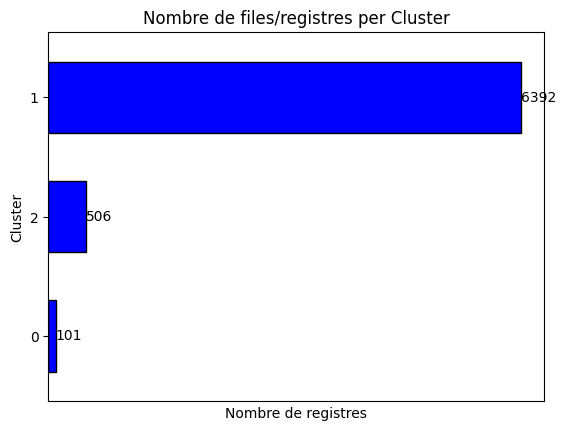

In [43]:
ax= df.cluster_pred_km.value_counts().sort_values().plot(kind='barh',color='blue',edgecolor='black',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('Nombre de registres')
plt.ylabel('Cluster')
plt.title('Nombre de files/registres per Cluster')

El cluster 2 és el més exclusiu, mentres que el cluster 0 acumula practicament totes les publicacions del dataset.

In [44]:
df.groupby('cluster_pred_km')[['num_reactions', 'num_comments', 'num_shares', 
                               'num_likes', 'num_loves', 'num_wows', 
                               'num_hahas', 'num_sads', 'num_angrys']].mean().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_pred_km,,,,,,,,,
0,591.66,6027.49,574.40,456.19,115.04,8.45,8.10,2.82,1.07
1,200.28,46.20,9.13,195.17,4.07,0.58,0.28,0.14,0.05
2,463.97,1333.17,326.82,347.51,102.05,8.30,4.55,0.90,0.66


Aquesta taula mostra la mitjana de cada cluster en funció de cada columna del dataset

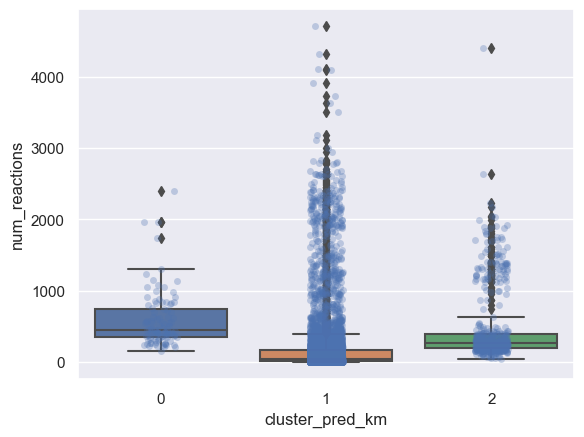

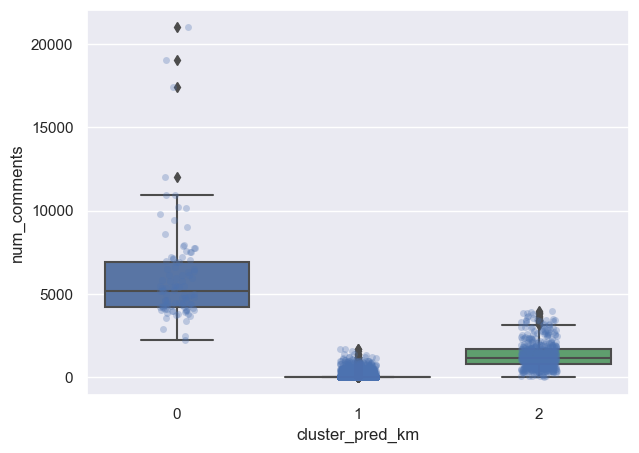

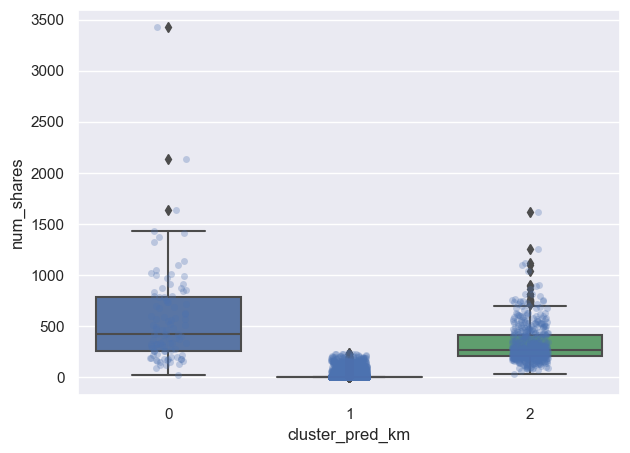

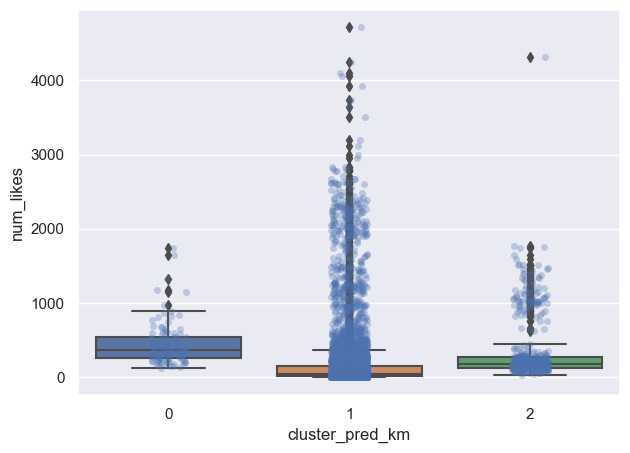

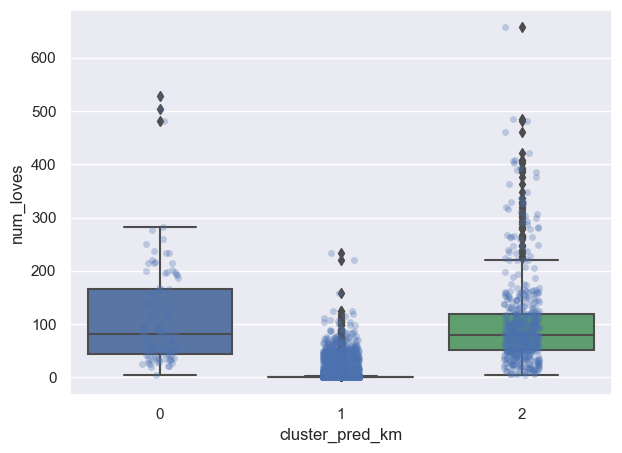

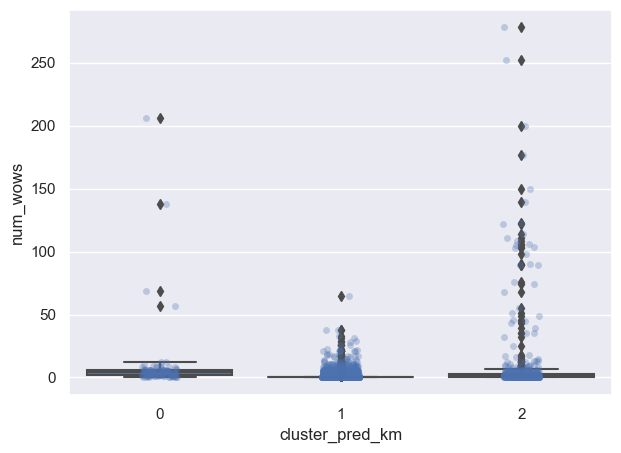

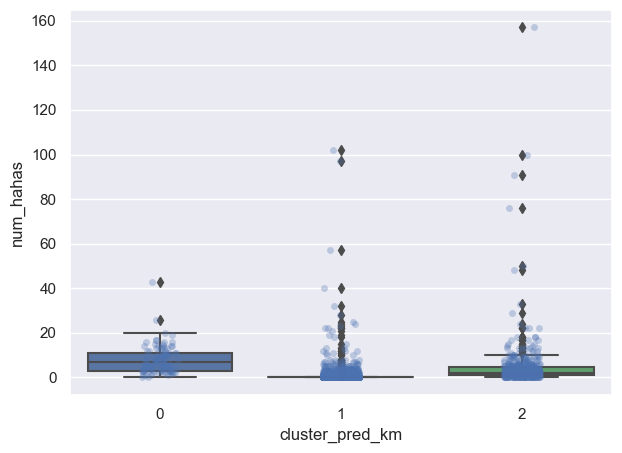

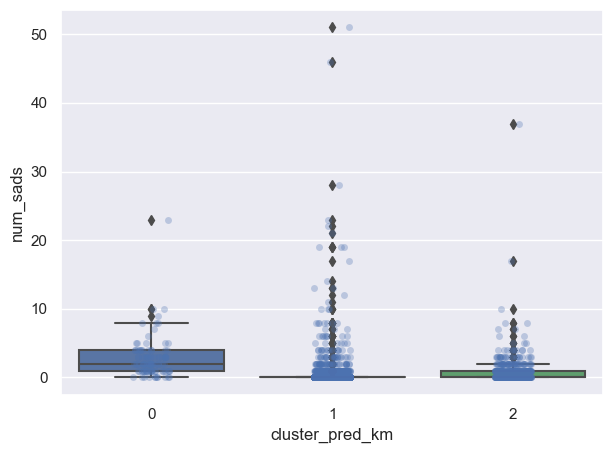

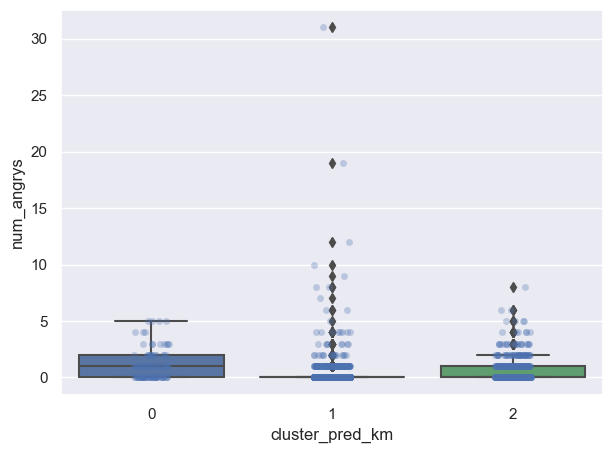

In [45]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='cluster_pred_km', y=i, data=df)
    sns.stripplot(x='cluster_pred_km', y=i, data=df, alpha=0.3)

Cada gràfic pertany a una columna del dataset, cada caixa pertany a un dels tres clusters. Es pot observar la concentració de les dades per a cada classe i com la mitjana del cluster 2 sempre és major que la del 0. A més, la caixa sempre és més gran per la classe 2, això indica una major dispersió de les dades.

In [46]:
df_scaled['cluster_pred_km'] = pred_km

In [47]:
df_scaled.groupby('cluster_pred_km')[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']].sum()

,status_type_link,status_type_photo,status_type_status,status_type_video
cluster_pred_km,,,,
0,0,1,0,100
1,63,4241,359,1729
2,0,2,0,504


En aquesta taula es pot veure la distribució de el tipus de publicació segons el cluster. Els clusters 1 i 2 s'asemblen molt ja que els dos contenen únicament videos. En canvi, el cluster 0 conté de tots els tipus de publicacions, sobretot fotos.

## - Exercici 2
### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.



L'algoritme de clustering jeràrquic treballa amb iteracions. A cada iteració, el model calcula la distància d'un punt amb la resta de punts i l'agrupa amb el més proper. Al principi hi han tants clusters com punts, però a cada iteració el nombre de clusters es redueix. El procés acava un cop només hi ha un cluster. Per mostrar gràficaments el procés, utilito un dendograma.

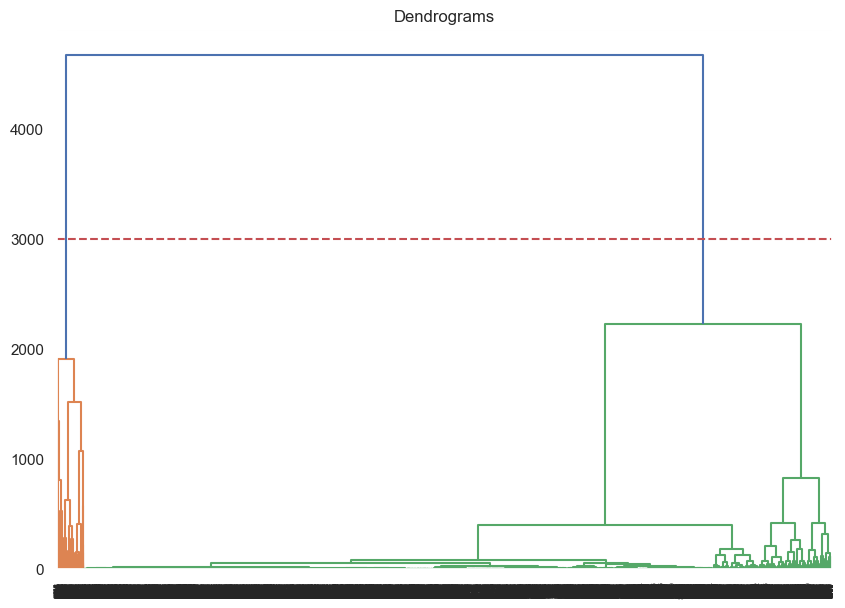

In [48]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))
plt.axhline(y=3000, color='r', linestyle='--')

L'eix de les x representa els punts, en aquest cas hi han 7050 punt (per això es solapen). L'eix de les y representa la distància entre clusters. Quan dos clusters es fusionen, es representa amb una caixeta que té una altura amb funció de la distància entre els dos punts. 

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2)  
pred_ac=cluster.fit_predict(pca_df)

In [50]:
pca_df['cluster_pred_ac'] = pred_ac #Crea la variable que conté les prediccions del nou model


In [51]:
df['cluster_pred_ac'] = pred_ac # Crea al dataset originalla var que conté les prediccions del nou model
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_pred_km,cluster_pred_ac
0,video,529,512,262,432,92,3,1,1,0,2,0
1,photo,150,0,0,150,0,0,0,0,0,1,0
2,video,227,236,57,204,21,1,1,0,0,1,0
3,photo,111,0,0,111,0,0,0,0,0,1,0
4,photo,213,0,0,204,9,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0,1,0
6995,photo,16,0,0,14,1,0,1,0,0,1,0
6996,photo,2,0,0,1,1,0,0,0,0,1,0
6997,photo,351,12,22,349,2,0,0,0,0,1,0


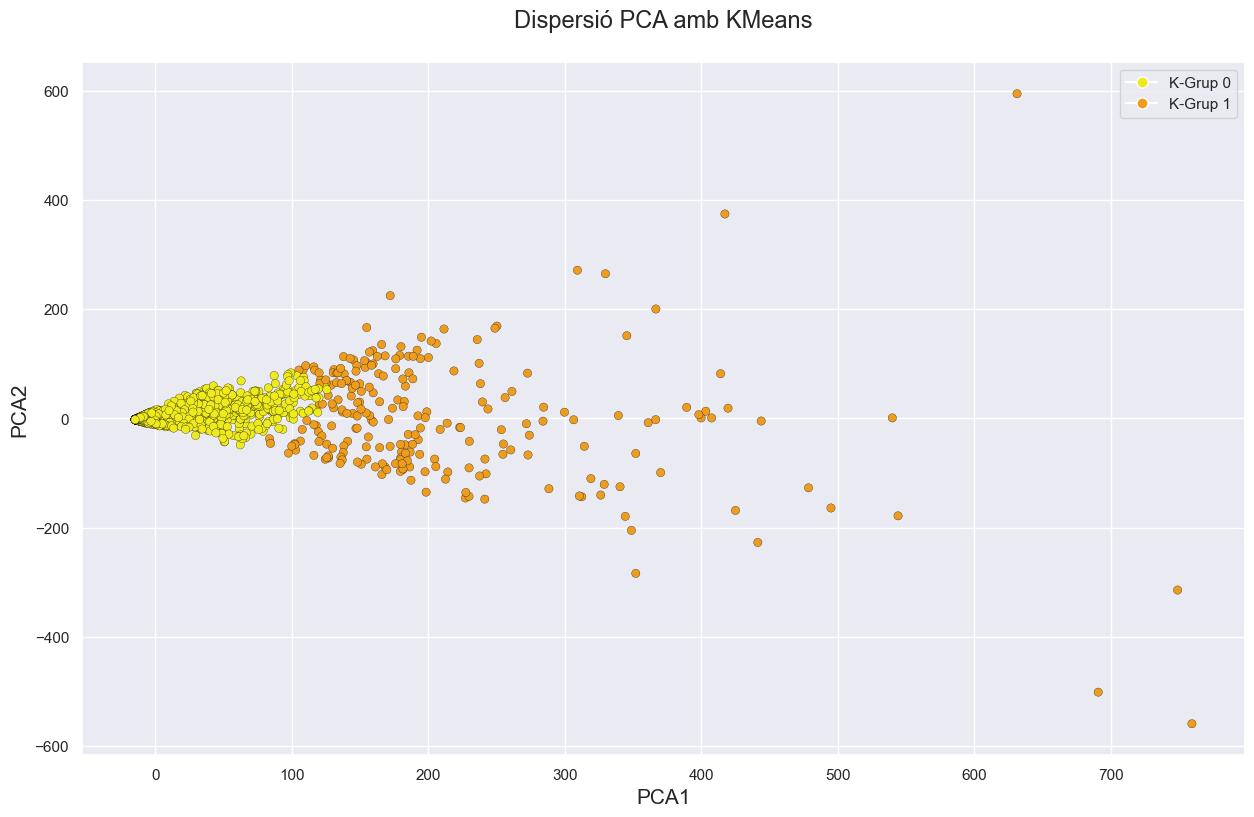

In [53]:
colors = ListedColormap(['#EEEA1D', '#EE9C1D'])
punts_legend = [plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 0', markerfacecolor='#EEEA1D', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 1', markerfacecolor='#EE9C1D', markersize=8)]

plt.figure(figsize = (15, 9))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pred_ac, cmap=colors, edgecolors='black', linewidths=0.2)
plt.title('Dispersió PCA amb KMeans\n', fontsize=17)
plt.legend(handles=punts_legend)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)

plt.show()

Cada color representa un cluster, hi han dos. El cluster 0 és més dispers que el cluster 1. 

Cada punt es tracta d'una publicació diferent classificada segons les seves característiques. Tot seguit, vaig a analitzar cada cluster per investigar quina es la relació de les dades classificades en un mateix cluster.

Text(0.5, 1.0, 'Nombre de registres per Cluster')

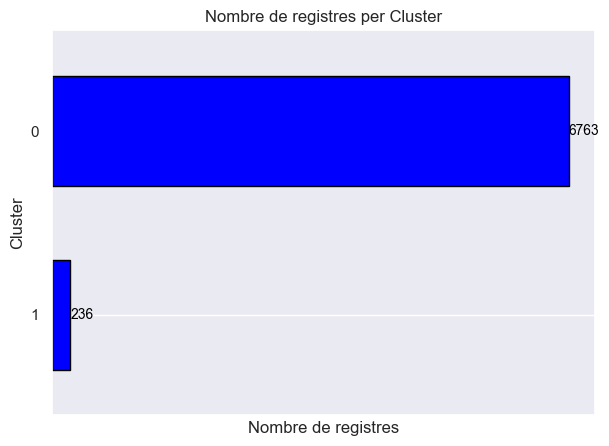

In [54]:
ax= df.cluster_pred_ac.value_counts().sort_values().plot(kind='barh',color='blue',edgecolor='black',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('Nombre de registres')
plt.ylabel('Cluster')
plt.title('Nombre de registres per Cluster')

La majoria de les dades pertanyen al cluster 1. 

In [55]:
df.groupby('cluster_pred_ac')[['num_reactions', 'num_comments', 'num_shares', 
                               'num_likes', 'num_loves', 'num_wows', 
                               'num_hahas', 'num_sads', 'num_angrys']].mean().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_pred_ac,,,,,,,,,
0,207.04,98.51,23.14,197.44,8.24,0.72,0.42,0.16,0.07
1,739.42,3866.23,530.86,568.44,142.07,16.67,8.77,2.30,1.18


Aquesta taula mostra la mitjana de cada cluster en funció de cada columna del dataset. Sembla que el model agrupa segons la popularitat de la publicació. De mitjana, el cluster 0 té moltes més interaccions que el cluster 1. On més es nota és al nombre de comentaris.  

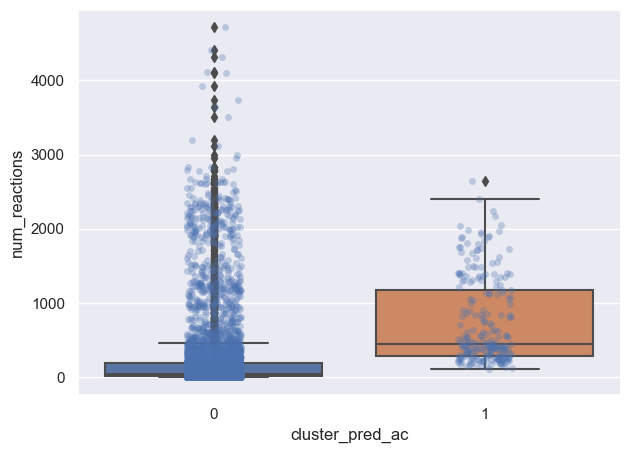

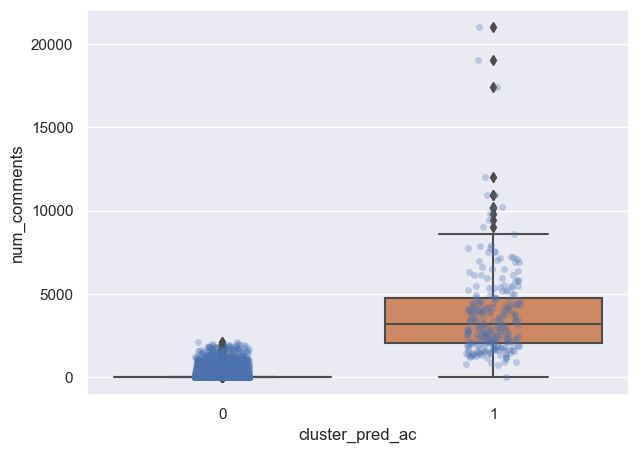

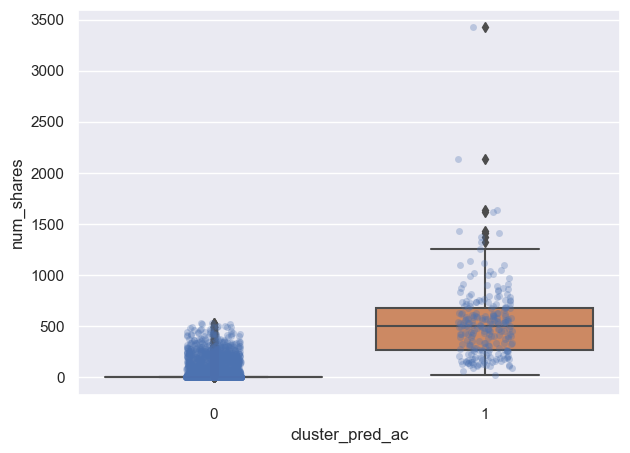

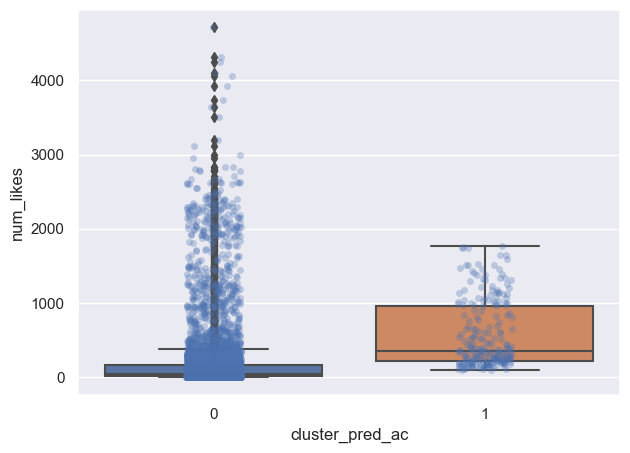

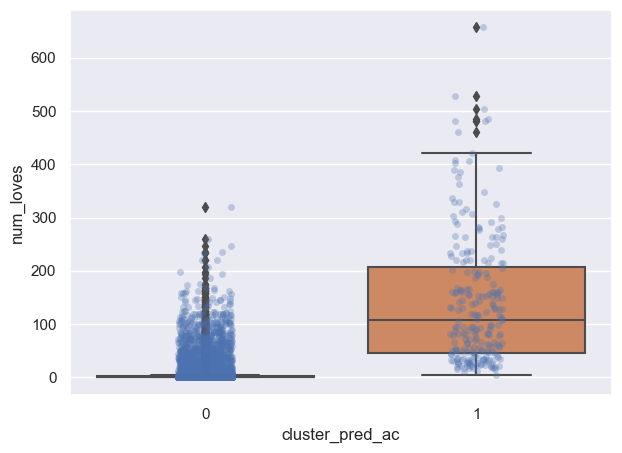

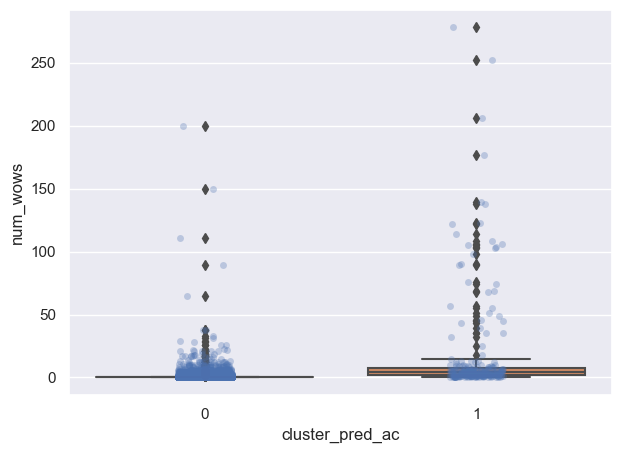

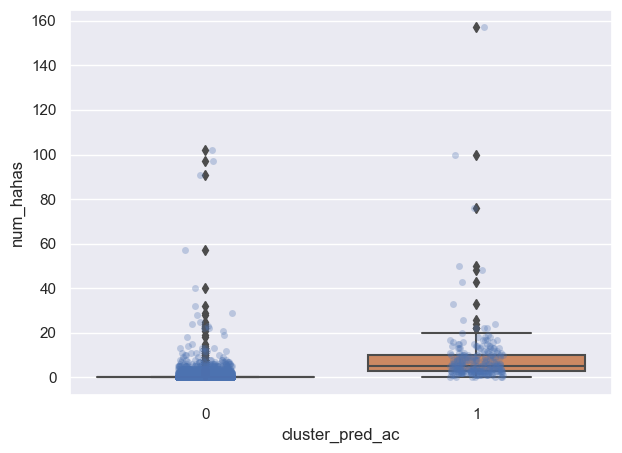

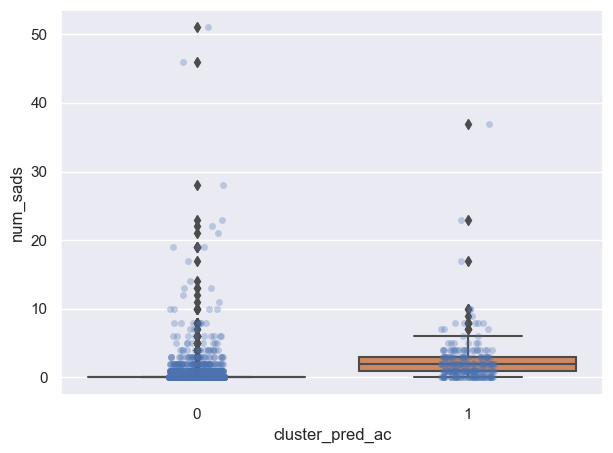

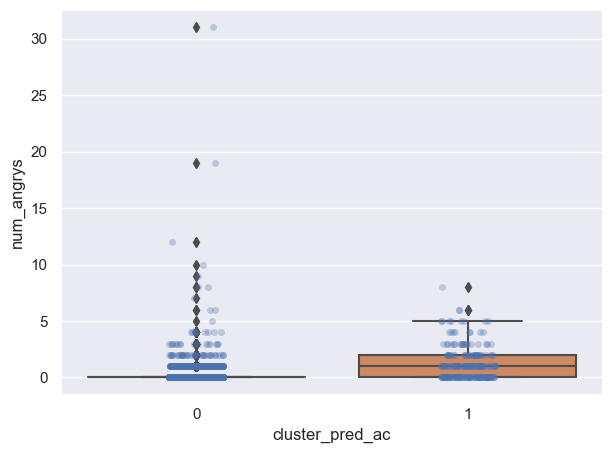

In [56]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='cluster_pred_ac', y=i, data=df)
    sns.stripplot(x='cluster_pred_ac', y=i, data=df, alpha=0.3)

Cada gràfic pertany a una columna del dataset, cada caixa pertany a un dels dos clusters. Es pot observar la concentració de les dades per a cada classe i com la mitjana de interaccions del cluster 0 sempre és major que la de l'1. A més, la caixa sempre és més gran per la classe 0, això indica una major dispersió de les dades.

In [57]:
df_scaled['cluster_pred_ac'] = pred_ac

In [58]:
df_scaled.groupby('cluster_pred_ac')[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']].sum()

,status_type_link,status_type_photo,status_type_status,status_type_video
cluster_pred_ac,,,,
0,63,4242,359,2099
1,0,2,0,234


El cluster 1 està format per videos, en canvi el cluster 0 té molta més varietat.

## - Exercici 3
### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [59]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df, pca_df["cluster_pred_km"])

In [60]:
print("El silhouette coefficient del model kmeans és: ", silhouette_avg.round(3))

El silhouette coefficient del model kmeans és:  0.871


In [61]:
silhouette_avg = silhouette_score(pca_df, pca_df["cluster_pred_ac"])
print("El silhouette coefficient del model de clustering jeràrquic és: ", silhouette_avg.round(3))

El silhouette coefficient del model de clustering jeràrquic és:  0.906


Segons el silhouette coefficient, el millor model és el de clustering jeràrquic, ja que dona el valor més alt. El clustering jeràrquic és el millor perquè la cohesió entre les dades de cada clúster és major.